<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h3>۱. تعریف Thread</h3>
<p>یک <em>Thread</em> یک مسیر اجرایی مستقل است که می‌تواند جدا از سایر مسیرها پیش برود. هر ریسمان در یک <em>فرآیند سیستم‌عاملی</em> (Process) اجرا می‌شود و این فرآیند یک محیط ایزوله و محافظت‌شده برای اجرای برنامه فراهم می‌کند. به عبارتی، فرآیند به عنوان یک ظرف یا فضای کاری برای ریسمان‌ها عمل می‌کند.</p>
<h3>۲. برنامه‌های تک‌ریسمانی</h3>
<p>در یک برنامه <em>تک‌ریسمانی</em>، تنها یک ریسمان در این محیط ایزوله اجرا می‌شود و بنابراین دسترسی انحصاری به منابع آن فرآیند را دارد. به دلیل اینکه تنها یک مسیر اجرایی وجود دارد، هیچ مشکلی از نظر دسترسی همزمان به منابع یا نیاز به همگام‌سازی پیش نمی‌آید.</p>
<h3>۳. برنامه‌های چندریسمانی</h3>
<p>در یک برنامه <em>چندریسمانی</em>، چندین ریسمان در یک فرآیند واحد اجرا می‌شوند و یک محیط اجرایی مشترک (به ویژه حافظه) را به اشتراک می‌گذارند. این ویژگی باعث می‌شود چندریسمانی مفید باشد؛ زیرا هر ریسمان می‌تواند به طور مستقل وظیفه‌ای را انجام دهد. به عنوان مثال، در حالی که یک ریسمان در حال دریافت داده‌ها از اینترنت است، ریسمان دیگری می‌تواند این داده‌ها را به کاربر نمایش دهد.</p>
<h3>۴. Shared State (حالت مشترک)</h3>
<p>اصطلاح <em>حالت مشترک</em> به داده یا منابعی اشاره دارد که بین ریسمان‌ها به اشتراک گذاشته می‌شوند. در برنامه‌های چندریسمانی، ریسمان‌ها باید با دسترسی به این داده‌ها هماهنگ شوند تا از مشکلاتی مانند تداخل و شرایط رقابتی جلوگیری شود.</p>

<p>به طور خلاصه، <em>Threading</em> به معنای ایجاد و مدیریت چندین مسیر اجرایی در یک برنامه است که می‌توانند مستقل از هم کار کنند و منابع مشترک را در یک محیط مشترک به اشتراک بگذارند.</p>
</div>

### Creating a Thread

`OS` => create single thread (`main` thread) => run `app`.  
<br />
> The CLR creates other threads behind the scenes for garbage collection and finalization.

In [ ]:
// NB: All samples in this chapter assume the following namespace imports:
using System;
using System.Threading;

Thread t = new Thread (WriteY); // Kick off a new thread
t.Start(); // running WriteY()

// Simultaneously, do something on the main thread.
for (int i = 0; i < 50; i++) Console.Write ("x");
void WriteY()
{
    for (int i = 0; i < 50; i++) Console.Write ("y");
}


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxyyyyyyyyxxxxxxxxxxxxxxxxxxxxxyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy

On a ***single-core*** computer,`OS` allocate `slices` of time to each thread (typically 20 ms in Windows) by `Scheduler`

On a ***multicore*** or ***multiprocessor*** machine, the `two threads` can genuinely `execute in parallel`

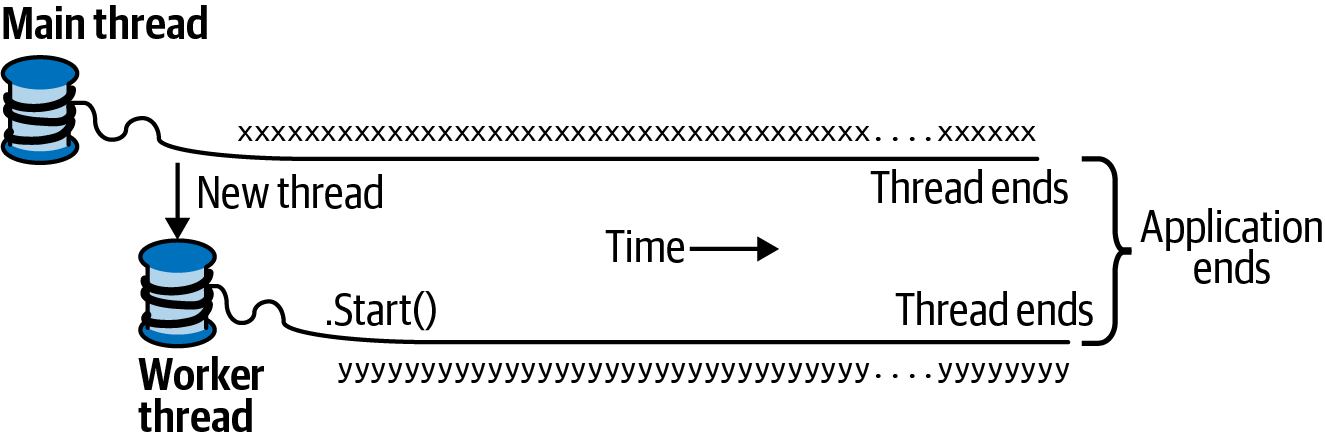

when `thread` start => `IsAlive` property return `true`.  

When does the `thread` stop? => when the `delegate` finishes executing.

after `thread` stop, it cannot `restart`. 

In [ ]:
using System;
using System.Threading;

Thread t1 = new Thread(testThreadIsLive);
t1.Start();
Console.WriteLine(t1.IsAlive);

await Task.Delay(1000);

Console.WriteLine(t1.IsAlive);

void testThreadIsLive()
{
    Console.WriteLine("test Thread IsLive;");
}

True
test Thread IsLive;
False


Each `thread` has a `Name` property.  

`name` is displayed in the `Threads Window`.  

You can set a thread’s name just once

In [ ]:
var t1 = new Thread(t1Delegate);
var t2 = new Thread(t2Delegate);

t1.Name = "test1";
t2.Name = "test2";

t1.Start();
t2.Start();

void t1Delegate()
{
    Task.Delay(5000).Wait();
    Console.WriteLine (Thread.CurrentThread.Name);
}

void t2Delegate()
{
    Task.Delay(10000).Wait();
    Console.WriteLine (Thread.CurrentThread.Name);
}

Task.Delay(3000).Wait();

Console.WriteLine($"test1: {t1.IsAlive} and test2: {t2.IsAlive}");

Task.Delay(3000).Wait();

Console.WriteLine($"test1: {t1.IsAlive} and test2: {t2.IsAlive}");

Task.Delay(5000).Wait();

Console.WriteLine($"test1: {t1.IsAlive} and test2: {t2.IsAlive}");

test1: True and test2: True
test1
test1: False and test2: True
test2
test1: False and test2: False


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h3>Preemption (جلوگیری از اجرا)</h3>
پیشگیری از اجرا زمانی رخ می‌دهد که یک نخ در حال اجرا به طور موقت متوقف می‌شود تا به نخ دیگری اجازه داده شود تا اجرا شود. این کار توسط برنامه‌ریز (Scheduler) سیستم عامل انجام می‌شود، که مسئول تخصیص زمان پردازنده به نخ‌های مختلف است.

چرا اتفاق می‌افتد؟ پیشگیری به سیستم عامل این امکان را می‌دهد تا منابع را به طور موثرتری بین نخ‌های مختلف تقسیم کند و اطمینان حاصل کند که برنامه‌های با اولویت بالاتر دسترسی سریع‌تری به پردازنده دارند. همچنین به جلوگیری از گرسنگی نخ‌ها کمک می‌کند، که در آن یک یا چند نخ به دلیل کمبود منابع قادر به اجرا نیستند.

اثرات بر برنامه‌نویسی: درک پیشگیری از اجرا برای برنامه‌نویسان مهم است، زیرا می‌تواند تاثیرات قابل توجهی بر روی رفتار برنامه داشته باشد. به عنوان مثال، زمانی که دو نخ به منابع مشترک دسترسی دارند، پیشگیری می‌تواند منجر به شرایط مسابقه شود، جایی که نتیجه اجرا به ترتیب زمان‌بندی نخ‌ها بستگی دارد. این می‌تواند باعث خطاهای دشوار در رفع اشکال شود، به خصوص اگر برنامه‌نویسی متوجه نشود که کد در یک محیط چندنخی اجرا می‌شود.

کاربردها در عیب‌یابی: اغلب زمانی که مشکلی در یک برنامه رخ می‌دهد، پیشگیری از اجرا به عنوان یک عامل محتمل بررسی می‌شود. برای مثال، اگر داده‌های به اشتراک گذاشته شده بین نخ‌ها به طور غیرمنتظره‌ای تغییر کند، ممکن است این تغییر به دلیل توقف نخ در حین پیشگیری و اجرای نخ دیگر باشد که منجر به دسترسی همزمان به داده‌ها شده است.
</div>

## Join and Sleep

You can `wait` for another thread to end by calling its `Join` method

In [ ]:
Thread t = new Thread (Go);
t.Start();
t.Join();
Console.WriteLine ("Thread t has ended!");
void Go() { for (int i = 0; i < 1000; i++) Console.Write ("y"); }

yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy

In [ ]:
//You can include a timeout when calling Join, either in milliseconds or as a TimeSpan.
// It then returns true if the thread ended or false if it timed out.

var t = new Thread(waitForSqlExecution);
t.Start();
var checkSmallerThad1Second = t.Join(1000);
if (checkSmallerThad1Second)
    Console.WriteLine("sql execution is very good");
else
    Console.WriteLine("sql execution is not good");

Thread.Sleep(2000);

void waitForSqlExecution()
    {
        Thread.Sleep(2000);
        Console.WriteLine($"end {nameof(waitForSqlExecution)} method");
    }

`Thread.Sleep(0)` 
<div dir="rtl">
وقتی Thread.Sleep(0) فراخوانی می‌شود، نخ فعلی به سیستم عامل اعلام می‌کند که زمان‌بندی (Time Slice) خود را که به آن اختصاص داده شده بود، به طور داوطلبانه رها می‌کند. این کار به سیستم عامل اجازه می‌دهد تا زمان پردازنده را به نخ‌های دیگری اختصاص دهد که آماده اجرا هستند.
</div>

`Thread.Yield()`  

<div dir="rtl">عملکرد: Thread.Yield() نیز به نخ فعلی امکان می‌دهد تا زمان‌بندی خود را به طور داوطلبانه رها کند، اما با این تفاوت که فقط به نخ‌هایی که در همان پردازنده (Processor) اجرا می‌شوند، فرصت اجرا می‌دهد.</div>

<div dir="rtl">استفاده از <code>Thread.Sleep(0)</code> و <code>Thread.Yield()</code> نه تنها می‌تواند در موارد خاص به بهبود عملکرد کمک کند، بلکه به عنوان ابزاری برای شناسایی مشکلات پیچیده همزمانی در برنامه‌های چندنخی نیز عمل می‌کند.</div>

While ***waiting*** on a `Sleep` or `Join`, a thread is `blocked`.

## Blocking

when execution is paused => thread is `blocked`  

`blocked` thread immediately yields its processor `time slice`

In [ ]:
using System.Threading;

var t =new Thread(testBlockingState);

var blocked = (t.ThreadState & ThreadState.WaitSleepJoin) != 0;

void testBlockingState(){}

Console.WriteLine(t.ThreadState);

Unstarted


When a ***thread*** `blocks` or `unblocks`, the OS performs a `context switch`. This incurs a ***small overhead***, typically `one or two microseconds.`

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h3>Context Switch</h3>
<p>
اشاره به فرآیندی دارد که در آن سیستم عامل از اجرای یک نخ جاری به نخ دیگری جابجا می‌شود. این امر معمولاً زمانی رخ می‌دهد که نخ فعلی منتظر منابع (مانند داده‌ها از یک فایل یا پایگاه داده) شود یا زمانی که نخی با اولویت بالاتر نیاز به اجرا دارد. 
<br/><br/>
زمینه نخ: زمینه یک نخ شامل تمام اطلاعات لازم برای اجرای آن نخ است، مانند مقادیر رجیستر، اشاره‌گرهای پشته (Stack Pointer)، و اطلاعات حالت برنامه.
</p>
<h3>فرآیند تعویض thread  </h3>
<p>
ذخیره‌سازی زمینه فعلی: سیستم عامل زمینه فعلی نخ جاری را ذخیره می‌کند تا بتواند بعداً به اجرای آن نخ برگردد.
بارگذاری زمینه نخ جدید: سپس زمینه نخ بعدی که قرار است اجرا شود را بارگذاری می‌کند. این شامل تنظیم رجیسترها و دیگر اطلاعات حالت به مقادیر مناسب برای نخ جدید است.
اجرای نخ جدید: پس از تنظیم زمینه برای نخ جدید، سیستم عامل اجرای آن نخ را آغاز می‌کند.
</p>

</div>

In [ ]:
//You can test for a thread being blocked via its ThreadState property
//ThreadState is a flags enum has three value
//ThreadState.Unstarted
//ThreadState.WaitSleepJoin
//ThreadState.Stopped

using System.Threading;

var t =new Thread(testBlockingState);

var blocked = (t.ThreadState & ThreadState.WaitSleepJoin) != 0;

void testBlockingState(){}

Console.WriteLine(t.ThreadState);

Unstarted


#### I/O-bound versus compute-bound

An ***operation*** that ***spends most of its time*** `waiting` for something to happen is called `I/O-bound`  
  
an ***operation*** that ***spends most of its time*** `performing CPU-intensive work` is called `computebound`.

#### Blocking versus spinning

<div dir="rtl">
<b>Blocking</b>: مسدود سازی اتفاق می‌افتد زمانی که نخی در انتظار اتفاقی خاص (مانند تکمیل عملیات ورودی/خروجی یا آزادسازی قفل) باشد و در این زمان، منابع پردازشی (CPU) را آزاد می‌کند.  <br/>
چگونگی کارکرد: زمانی که یک نخ مسدود می‌شود، سیستم عامل آن نخ را از حالت اجرا خارج می‌کند و منابع پردازشی را به نخ‌های دیگر اختصاص می‌دهد. نخ در این حالت هیچ منبع CPU‌ای مصرف نمی‌کند.

</div>

In [ ]:
while (DateTime.Now < DateTime.Now.AddMinutes(30))
Thread.Sleep (100);

<div dir="rtl">

<b>Spinning</b>: چرخش زمانی رخ می‌دهد که نخ به طور فعال در حالت انتظار بماند، معمولاً با اجرای یک حلقه بی‌پایان تا زمانی که شرط خاصی برآورده شود. <br/>
چگونگی کارکرد: در حالت چرخش، نخ همچنان منابع CPU را اشغال می‌کند حتی اگر کار مفیدی انجام ندهد. این کار می‌تواند منجر به هدر رفت منابع شود چون نخ دیگری نمی‌تواند از CPU استفاده کند.

</div>

In [ ]:
while (DateTime.Now < DateTime.Now.AddMinutes(30));

### Local Versus Shared State

In [ ]:
new Thread (Go).Start(); // Call Go() on a new thread
Go(); // Call Go() on the main thread
void Go()
{
    // Declare and use a local variable - 'cycles'
    for (int cycles = 0; cycles < 5; cycles++) 
        Console.Write ('?');
}

The `CLR` assigns each thread its `own memory stack` so that local variables are kept separate.  
  
A ***separate copy*** of the `cycles` variable is created on each `thread’s memory stack`

***Threads*** `share data` if they have a `common reference to the same object` or variable:

In [1]:
using System.Threading;

bool _done = false;
new Thread (Go).Start();
Go();
void Go()
{
    if (!_done) { _done = true; Console.WriteLine ("Done"); }
}

Done


***Local variables*** `captured` by a ***lambda expression*** can also `be shared`

In [2]:
bool done = false;
ThreadStart action = () =>
{
    if (!done) { done = true; Console.WriteLine ("Done"); }
};
new Thread (action).Start();
action();

Done


More commonly, though, `fields` are used to `share data between threads`.

In [ ]:
var tt = new ThreadTest();
new Thread (tt.Go).Start();
tt.Go();
class ThreadTest
{
    bool _done;
    public void Go()
    {
        if (!_done) { _done = true; Console.WriteLine ("Done"); }
    }
}

Done


`Static fields` offer another way to `share data between threads`:

In [ ]:
ThreadTest.Main();

class ThreadTest
{
    static bool _done;  // Static fields are shared between all threads
                        // in the same process.
    public static void Main()
    {
        new Thread (Go).Start();
        Go();
    }
    static void Go()
    {
        if (!_done) { _done = true; Console.WriteLine ("Done"); }
    }
}

Done


it’s possible (though unlikely) that `Done` could be printed `twice`.

In [ ]:
ThreadTest.Main();

class ThreadTest
{
    static bool _done; // Static fields are shared between all threads
// in the same process.
    public static void Main()
    {
        new Thread (Go).Start();
        Go();
    }
    static void Go()
    {
        if (!_done) {  Console.WriteLine ("Done"); _done = true;}
    }
}

### Thread Safety and Locking

In [ ]:
//C# provides the lock statement for just this purpose

ThreadSafe.Main();

class ThreadSafe
{
    static bool _done;
    static readonly object _locker = new object();
    public static void Main()
    {
        new Thread (Go).Start();
        Go();
    }
    static void Go()
    {
        lock (_locker)
        {   
            if (!_done) { 
                _done = true; 
                Console.WriteLine ("Done");
            }
        }
    }
}

any `reference-type` object can be use for `lock`

Code that protected by lock way is `Thread Safe`

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h3>نقش دقیق <code>_locker</code></h3>
<ul><li>در اینجا، <code>_locker</code> به عنوان یک <strong>شیء کلید</strong> عمل می‌کند. هر زمان که <code>lock (_locker)</code> اجرا می‌شود، نخی که آن را اجرا کرده است، یک قفل روی این شیء می‌گیرد.</li><li>اگر نخ دیگری تلاش کند وارد همین بلاک کد شود (که همان شیء <code>_locker</code> را به عنوان کلید استفاده می‌کند)، آن نخ باید منتظر بماند تا نخ اول قفل را آزاد کند.</li></ul>
<p>این کار باعث می‌شود که عملیات داخل بلاک <code>lock</code> تنها یک بار و توسط یک نخ انجام شود، تا از ایجاد شرایط رقابتی (race condition) جلوگیری کند.</p>
</div>

In [ ]:
//C# provides the lock statement for just this purpose

ThreadSafe.Main();

class ThreadSafe
{
    static bool _done;
    static readonly object _locker = new object();
    public static void Main()
    {
        new Thread (Go).Start();
        Go();
    }
    static void Go()
    {
        lock (_locker)
        {   
            if (!_done) { 
                _done = true; 
                Console.WriteLine ("Done");
            }
        }

        lock(_locker)
        {
            //some code
        }
    }
}

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p> زمانی که یک Thread وارد اولین بلوک <code>lock(_locker)</code> شود، شیء <code>_locker</code> قفل می‌شود. بنابراین، تا زمانی که این Thread قفل را آزاد نکند (یعنی از بلوک <code>lock</code> خارج نشود)، هیچ Thread دیگری نمی‌تواند وارد هیچ‌کدام از بلوک‌های <code>lock(_locker)</code> شود، حتی اگر بلوک متفاوتی باشد، مثل بلوک دوم در کد شما.</p>
</div>

### Race Condition

`x++` problem.  
Read-Increment-Write maybe occurence at same time by two thread

In [ ]:
RaceConditionExample.Main();

class RaceConditionExample
{
    private static int counter = 0;

    public static void Main()
    {
        Thread t1 = new Thread(IncrementCounter);
        Thread t2 = new Thread(IncrementCounter);
        
        t1.Start();
        t2.Start();
        
        t1.Join();
        t2.Join();
        
        Console.WriteLine($"Final counter value: {counter}");
    }

    static void IncrementCounter()
    {
        for (int i = 0; i < 100000; i++)
        {
            counter++;
        }
    }
}


Final counter value: 116017


### DeadLock

<div dir="rtl">

بن‌بست زمانی رخ می‌دهد که دو یا چند نخ به طور دائمی منتظر آزادسازی قفل‌هایی باشند که توسط یکدیگر در اختیار گرفته شده‌اند، و در نتیجه هیچ کدام نمی‌توانند ادامه پیدا کنند.

</div>

In [ ]:
using System;
using System.Threading;

class DeadlockExample
{
    private static readonly object lock1 = new object();
    private static readonly object lock2 = new object();

    static void Main()
    {
        new Thread(Thread1).Start();
        new Thread(Thread2).Start();
    }

    static void Thread1()
    {
        lock (lock1)
        {
            Console.WriteLine("Thread 1 acquired lock1");
            Thread.Sleep(1000); // Wait to ensure Thread 2 can lock lock2
            lock (lock2)
            {
                Console.WriteLine("Thread 1 acquired lock2");
            }
        }
    }

    static void Thread2()
    {
        lock (lock2)
        {
            Console.WriteLine("Thread 2 acquired lock2");
            Thread.Sleep(1000); // Wait to ensure Thread 1 can lock lock1
            lock (lock1)
            {
                Console.WriteLine("Thread 2 acquired lock1");
            }
        }
    }
}


## Passing Data to a Thread

In [ ]:
//The easiest way to do this is with a lambda expression 
//that calls the method with the desired arguments
using System.Threading;

Thread t = new Thread ( () => Print ("Hello from t!") );
t.Start();
void Print (string message) => Console.WriteLine (message);

In [ ]:
//An alternative (and less flexible) technique is to 
//pass an argument into Thread’s Start method
using System.Threading;

Thread t = new Thread (Print);
t.Start ("Hello from t!");

void Print (object messageObj)
{
string message = (string) messageObj; // We need to cast here
Console.WriteLine (message);
}

### Lambda expressions and captured variables

In [1]:
using System.Threading;

for (int i = 0; i < 10; i++)
new Thread (() => Console.Write (i)).Start();

22345678910

In [6]:
//The solution is to use a temporary variable
for (int i = 0; i < 10; i++)
{
    int temp = i;
    new Thread (() => Console.Write (temp)).Start();
}

1023456789

In [ ]:
string text = "t1";
Thread t1 = new Thread ( () => Console.WriteLine (text) );
text = "t2";
Thread t2 = new Thread ( () => Console.WriteLine (text) );
t1.Start(); t2.Start();

t2
t2


## Exeption Handling

In [ ]:
using System.Threading;
try
{
    new Thread (Go).Start();
}
catch (Exception ex)
{
    // We'll never get here!
    Console.WriteLine ("Exception!");
}
void Go() 
{ 
    throw null; 
} // Throws a NullReferenceException

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn; text-align:justify">

نکته کلیدی اینجا این است که وقتی یک نخ (thread) جدید در C# ایجاد می‌شود، هر گونه بلوک try/catch/finally که در زمان ایجاد نخ در حال اجرا بوده، برای آن نخ جدید اعمال نمی‌شود. به عبارت دیگر، استثناهایی که در یک نخ جدید رخ می‌دهند، تحت تأثیر بلوک‌های try/catch/finally که قبل از شروع نخ وجود داشتند، قرار نمی‌گیرند. هر نخ دارای محدوده و مکانیزم کنترل استثنای خود است.

</div>

In [ ]:
using System.Threading;

new Thread (Go).Start();
void Go()
{
    try
    {
        throw null; // The NullReferenceException will get caught below
    }
    catch (Exception ex)
    {
        // Typically log the exception and/or signal another thread
        // that we've come unstuck
        Console.WriteLine ("Exception!");
    }
}

Exception!
